In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go

from sklearn.cluster import KMeans

%matplotlib inline
py.offline.init_notebook_mode(connected = True)
plt.style.use("fivethirtyeight")
# plt.rcParams.keys()
plt.rcParams["font.size"] = 8

import warnings
warnings.filterwarnings("ignore")

# data

## data read

In [3]:
df = pd.read_csv("Mall_Customers.csv")

## data eda

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 数值特征

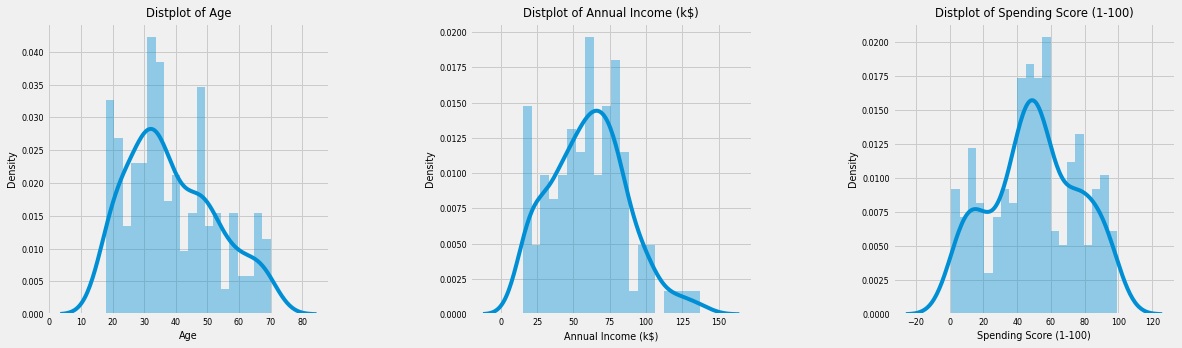

In [65]:
numeric_cols = df.columns[2:].tolist()
plt.figure(1,figsize=(18, 5))  # 画布大小
for n, col in enumerate(cols, 1):
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
    sns.distplot(df[col], bins = 20)
    plt.title(f'Distplot of {col}')
plt.show()

### 类别特征

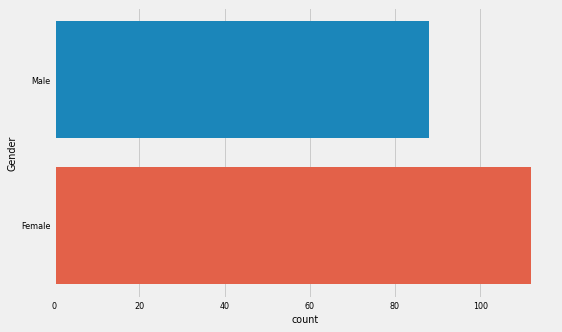

In [66]:
categorical_cols = df.columns[1]
plt.figure(1, figsize = (8, 5))
sns.countplot(y = categorical_cols, data = df)
plt.show()

### 交叉特征

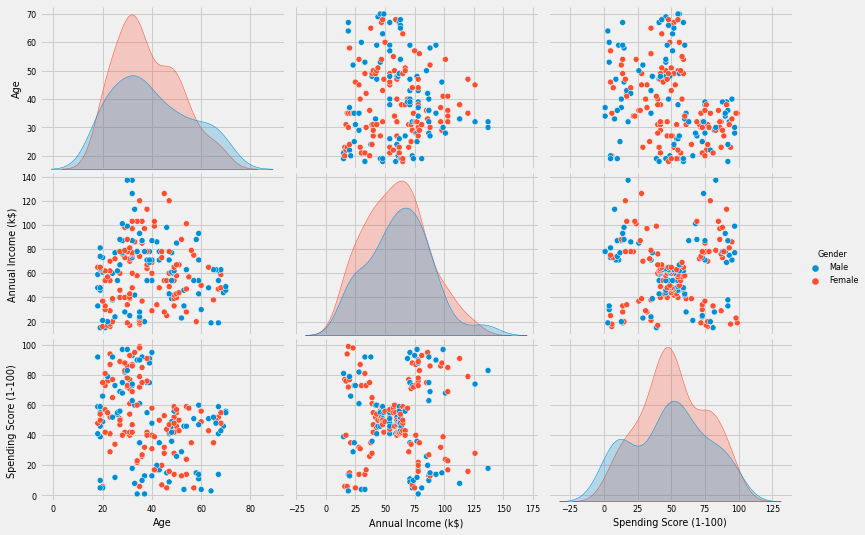

In [64]:
sns.pairplot(df.drop(["CustomerID"], axis = 1), hue = categorical_cols, aspect = 1.5)
plt.show()

# cluster

## K selection

In [90]:
df_train = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values
inertia = []
for k in range(1, 11):
    algorithm = KMeans(
        n_clusters = k,
        init = "k-means++",
        n_init = 10,
        max_iter = 300,
        tol = 1e-4,
        random_state = 111,
        algorithm = "full",
    )
    algorithm.fit(df_train)
    inertia.append(algorithm.inertia_)

In [91]:
inertia

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.583566629335,
 23839.439633173846,
 19576.013221355326,
 15514.19313435103,
 13020.333585858585,
 11480.045478271728,
 10187.846101364523]

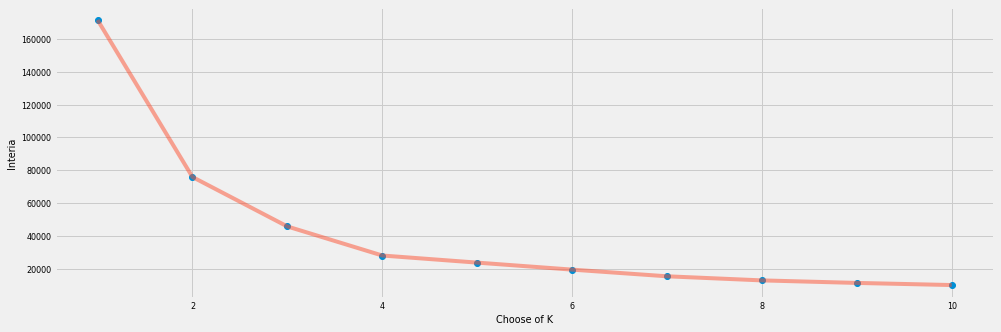

In [92]:
plt.figure(1, figsize = (15, 5))
plt.plot(np.arange(1, 11), inertia, "o")
plt.plot(np.arange(1, 11), inertia, "-", alpha = 0.5)
plt.xlabel("Choose of K")
plt.ylabel("Interia")
plt.show()

## model

In [93]:
algorithm = KMeans(
    n_clusters = 4,
    init = "k-means++",
    n_init = 10,
    max_iter = 300,
    tol = 1e-4,
    random_state = 111,
    algorithm = "elkan"
)
algorithm.fit(df_train)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_
print(f"labels: {labels}")
print(f"centroids: {centroids}")

labels: [0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
centroids: [[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


## 结果展示

In [96]:
df_result = pd.DataFrame(df_train, columns = ["Age", "Spending Score(1-100)"])
df_result["Labels"] = labels
df_result

,Age,Spending Score(1-100),Labels
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


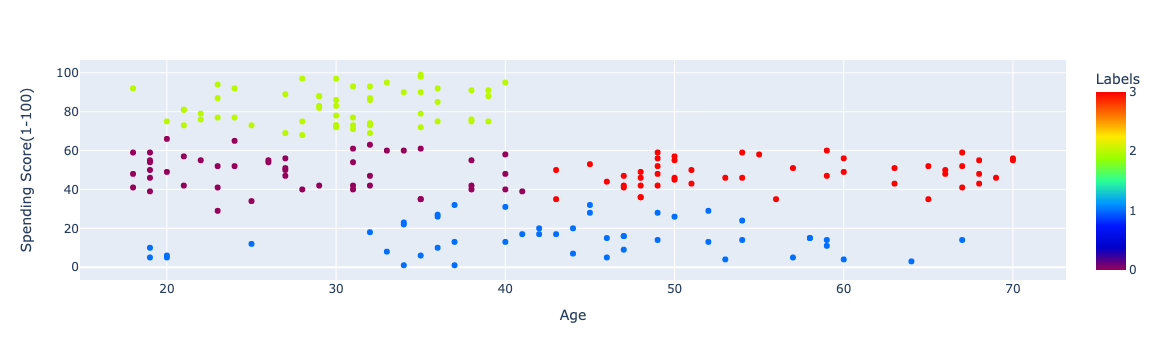

In [97]:
px.scatter(
    df_result, 
    x = "Age", 
    y = "Spending Score(1-100)", 
    color = "Labels", 
    color_continuous_scale = "rainbow"
)